In [ ]:
#topic modelling on indian headlines

**To show TOP INDIAN MEDIA TOPICS using concept of TOPIC MODELLING**

TOPIC MODELLING USING LDA TECHNIQUE

*LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.*


**LOADING DATA**

*DATA source : https://www.kaggle.com/datasets/therohk/india-headlines-news-dataset*


*   This news dataset is a persistent historical archive of noteable events in the Indian subcontinent from start-2001 to q2-2023, recorded in real-time by the journalists of India. It contains approximately 3.8 million events published by Times of India.

  A majority of the data is focusing on Indian local news including national, city level and entertainment.
*   Time Range : Start Date: 2001-01-01 ; End Date: 2023-06-30

    CSV Rows: 3,876,557



In [1]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("/content/drive/MyDrive/Datasets/india-news-headlines.csv")

# Print head
papers.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [6]:
papers.tail()


,publish_date,headline_category,headline_text
3876552,20230630,city.goa,10 PIs move HC over thwarted seniority
3876553,20230630,city.goa,Govt notifies award in memory of Parrikar for ...
3876554,20230630,city.goa,After youth's death; PWD installs crash barrie...
3876555,20230630,city.goa,Authorities not acting against CRZ violations
3876556,20230630,city.goa,Technicians to hold trial run of mini-EVs in P...


**DATA CLEANING**
*Only for headlines insight view will perform data cleaning feed data into a new dataframe, to work only on headlines*

In [8]:
headlines=papers.drop(columns=['publish_date','headline_category'])
headlines

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic
...,...
3876552,10 PIs move HC over thwarted seniority
3876553,Govt notifies award in memory of Parrikar for ...
3876554,After youth's death; PWD installs crash barrie...
3876555,Authorities not acting against CRZ violations


In [10]:
#only included abstract part of the paper not the entire text parts
# Load the regular expression library
import re

# Remove punctuation
headlines['text_processed'] = \
headlines['headline_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
headlines['text_processed'] = \
headlines['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
headlines['text_processed'].head()

0    status quo will not be disturbed at ayodhya; s...
1                  fissures in hurriyat over pak visit
2                 america's unwanted heading for india
3                   for bigwigs; it is destination goa
4                 extra buses to clear tourist traffic
Name: text_processed, dtype: object

*To verify whether the preprocessing, we’ll make a simple word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.*

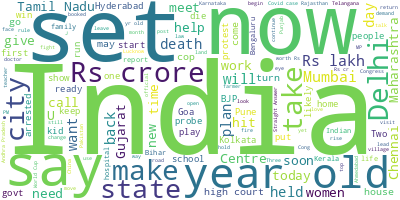

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(headlines['headline_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()